<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/DataInput_Phase_Qiskit_AerSimulator_mkbahk_20241023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=189ec8c436af9ebe3328cad45719da1254c8421acadaf2270bf7cdc12e81171d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.2 MB/s eta 0:00:00


In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
import qiskit
qiskit.__version__

'1.2.4'

In [4]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [5]:
from qiskit_aer import Aer, AerSimulator, QasmSimulator, StatevectorSimulator, UnitarySimulator
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [6]:
#backend =Aer.get_backend("qasm_simulator")
#backend =Aer.get_backend("aer_simulator_statevector")
#backend =Aer.get_backend("aer_simulator_unitary")
#backend = QasmSimulator()
backend = StatevectorSimulator()
#backend = UnitarySimulator()

In [160]:
import numpy as np
# 원하는 회전 각도 (라디안 단위) 설정
theta = 3 * np.pi/2  # x축 회전

# 양자 회로 생성
circuit = QuantumCircuit(4)

# 각 축에 대한 회전 게이트 적용
circuit.rx(theta, 0)  # x축 회전
circuit.ry(theta, 1)  # y축 회전
circuit.rz(theta, 2)  # z축 회전
circuit.rx(theta, 3)  # x축 회전
circuit.ry(theta, 3)  # y축 회전
circuit.rz(theta, 3)  # z축 회전

# 측정 전후의 결과(붕괴)가 다르기 때문에 아래 코드를 Enable/Disable하면서 결과를 출력하세요.

In [161]:
#circuit.measure_all()  #측정하면 붕괴되어서 여기서는 특정하면 않됩니다.

# Data Input - Phase

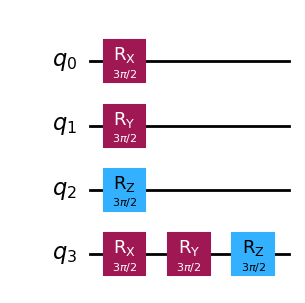

In [162]:
circuit.draw(output="mpl")

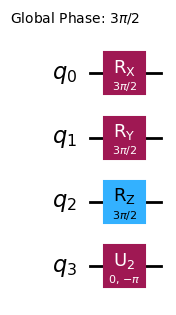

In [163]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(circuit, backend=backend)
trans_qc.draw("mpl")

In [164]:
#from qiskit.providers.jobstatus import JobStatus
#import time

#job = backend.run(trans_qc, shots=1024)

#print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
#while job.status() is not JobStatus.DONE:
#	print("Job status is", job.status() )
#	time.sleep(2)
###while


#print("Job status is", job.status() )

# 결과 출력
#counts = job.result().get_counts()
#print(counts)

In [165]:
from qiskit.providers.jobstatus import JobStatus

job = backend.run(trans_qc, shots=1024)
#job = backend.run(circuit, shots=1024)
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: 689dc9f8-21ae-4221-8327-171c716f0160


In [166]:
print(job.status())

JobStatus.DONE


In [167]:
### 서비스 플렛폼에 중간에 세션이 종료되었을 경우, Job이 완료되면 그 Job.ID를 이용해 결과를 추출합니다. ###
#job = service.job("csbevjh3olk6fc8cr0n0")

In [168]:
result = job.result()
result

Result(backend_name='statevector_simulator', backend_version='0.15.1', qobj_id='', job_id='689dc9f8-21ae-4221-8327-171c716f0160', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(statevector=Statevector([-0.25+0.25j, -0.25-0.25j,  0.25-0.25j,  0.25+0.25j,
              0.  +0.j  ,  0.  +0.j  , -0.  +0.j  , -0.  +0.j  ,
             -0.25+0.25j, -0.25-0.25j,  0.25-0.25j,  0.25+0.25j,
              0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ],
            dims=(2, 2, 2, 2))), header=QobjExperimentHeader(creg_sizes=[], global_phase=4.71238898038469, memory_slots=0, n_qubits=4, name='circuit-193', qreg_sizes=[['q', 4]], metadata={}), status=DONE, seed_simulator=492301722, metadata={'time_taken': 0.000189793, 'num_bind_params': 1, 'parallel_state_update': 2, 'required_memory_mb': 1, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 4, 'active_input_qubits': [0, 1, 2, 3],

# 진폭(Applitude)의 확률 출력하기

In [169]:
counts = result.get_counts()
counts

{'0000': 0.125,
 '0001': 0.125,
 '0010': 0.125,
 '0011': 0.125,
 '1000': 0.125,
 '1001': 0.125,
 '1010': 0.125,
 '1011': 0.125}

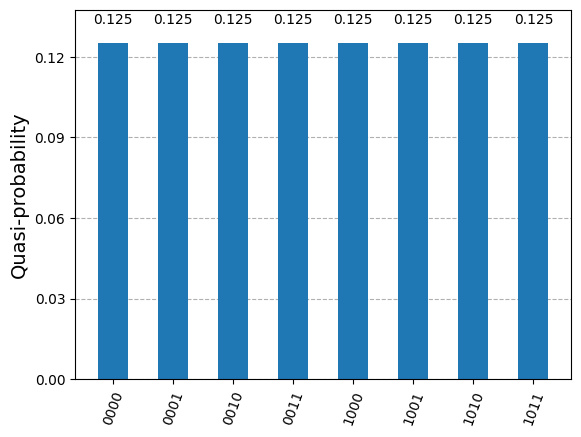

In [170]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

#상태벡터 출력하기

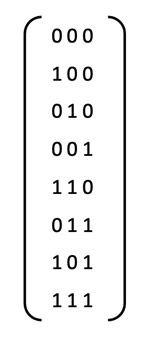

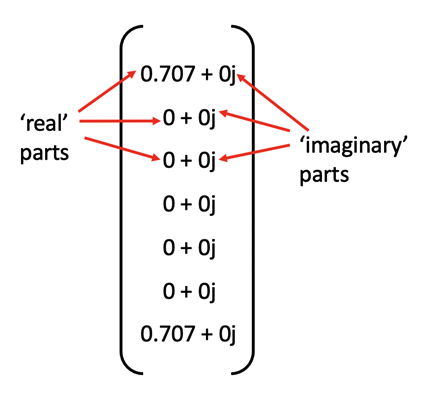

In [171]:
statevector = result.get_statevector()
statevector

Statevector([-0.25+0.25j, -0.25-0.25j,  0.25-0.25j,  0.25+0.25j,
              0.  +0.j  ,  0.  +0.j  , -0.  +0.j  , -0.  +0.j  ,
             -0.25+0.25j, -0.25-0.25j,  0.25-0.25j,  0.25+0.25j,
              0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ],
            dims=(2, 2, 2, 2))


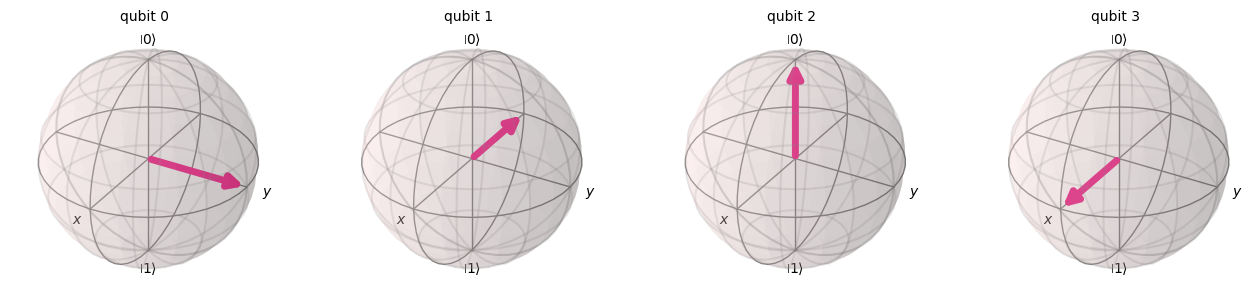

In [172]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)